# A simple demonstration

*The ultimate goal was to devise a set of methods that would allow to compute the total area of multiple circles. The method would have to take into account that overlapping areas can only be included once. Some links:*

* https://stackoverflow.com/questions/1667310/combined-area-of-overlapping-circles
* http://paulbourke.net/geometry/circlesphere/
* http://www.mathopenref.com/coordpolygonarea2.html

--- 

### Imports

##### General

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

##### Package

In [2]:
from geom.circl import Point, Circle

--- 

### Definitions

##### Function for (fig,ax) with specific parameters

In [3]:
def figAx(xlim, ylim):
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ### Spines parameters
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_color('grey')
    ax.spines['bottom'].set_color('grey')
    ### Limits parameters
    ax.set_xlim([0, xlim])
    ax.set_ylim([0, ylim])
    ### Ticks parameters
    ax.tick_params(axis='x', colors='black')
    ax.tick_params(axis='y', colors='black')
    plt.xticks(np.arange(0, xlim+1, 2.0))
    plt.yticks(np.arange(0, ylim+1, 2.0))
    ## Grid
    plt.grid(b=True, which='major', color='grey', linestyle='--')
    
    return fig, ax

 ---

### Example

##### Intro

Everyting sits within the Circle class. Either provide it a set of circles to initialize:

In [4]:
mc = Circle([[5,5,1],[5,8,3]])

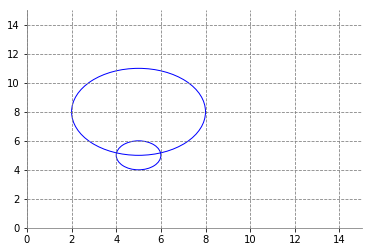

In [5]:
fig, ax = figAx(15,15)
for c in mc:
    cplot = plt.Circle((c.x, c.y), c.r, fill=False, color='blue')
    ax.add_artist(cplot)

Or create them randomly:

In [6]:
mc = Circle.random(x_min=2, x_max=13, y_min=2, y_max=13, radius_min=1, radius_max=2, nr_circles=25)

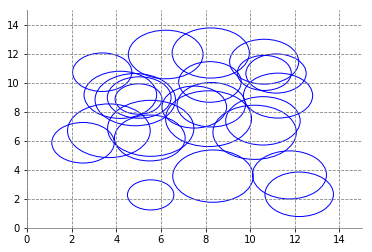

In [7]:
fig, ax = figAx(15,15)
for c in mc:
    cplot = plt.Circle((c.x, c.y), c.r, fill=False, color='blue')
    ax.add_artist(cplot)

##### Example of a method

Sine the parent class is the np.ndarray, some methods work in a vectorized fashion. This is the case for example for computing all intersections with a Circle.

In [8]:
i1, i2 = mc.drop(0).intersect(mc[0])

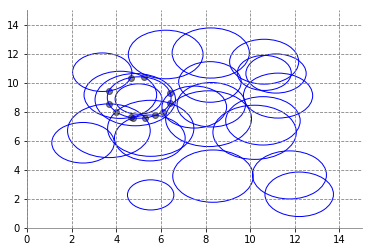

In [9]:
fig, ax = figAx(15,15)
for c in mc:
    cplot = plt.Circle((c.x, c.y), c.r, fill=False, color='blue')
    ax.add_artist(cplot)
plt.scatter(i1.x, i1.y, color='black', alpha=.5)
plt.scatter(i2.x, i2.y, color='black', alpha=.5)

#### Example calculating the total area

Calculating the total area requires a few steps.

(1) Get all the intersections.

In [10]:
mc.calc_intersections()

(2) From which we can compute the different clusters.

In [11]:
mc.calc_clusters()

(3) Then for each cluster we compute the (inner and outer) boundaries of the cluster, after which we can compute the area.

In [12]:
all_areas = []
for i in range(mc.nr_clusters):
    cluster = mc.get_cluster(i)
    cluster.calc_boundaries()
    area = cluster.flatArea()
    all_areas.append(area)
print(sum(all_areas))

106.8234967625496


For some control we can compute the area by simulating points in a bounded box and mulitplying the share within the box with the area of that box.

In [13]:
mc.simArea()

106.54783291989392

##### Plotting

Some of the intermediary results can be used for plotting. 
* We plot single-circle clusters blue, double-circle clusters orange and multi-circle clusters green. 
* We link the outer boundaries with a black line, the inner boundaries with a green dotted line. 
* Circles on the outer boundary which are more than half over the boundary segment get a "+", and the same is done for circles on the inner boundary but they get a "-" (those circles get a different area calculation treatment).

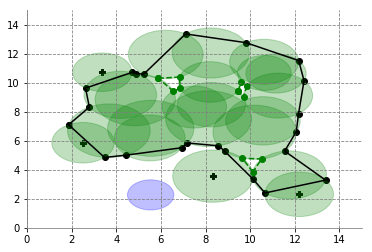

In [14]:
fig, ax = figAx(15,15)

for i in range(mc.nr_clusters):
    cluster = mc.get_cluster(i)
    
    if len(cluster)==1:
        c = cluster[0]
        cplot = plt.Circle((c.x, c.y), c.r, color='blue', fill=True, alpha=.25)
        ax.add_artist(cplot)
        
    if len(cluster)==2:
        for c in cluster:
            cplot = plt.Circle((c.x, c.y), c.r, color='orange', fill=True, alpha=.25)
            ax.add_artist(cplot)
        
    if len(cluster)>2:
        # For every cluster...
        for c in cluster:
            cplot = plt.Circle((c.x, c.y), c.r, color='green', fill=True, alpha=.25)
            ax.add_artist(cplot)
            
        cluster.calc_boundaries()
        # Get the outer boundaries & Circles. 
        ordered_b, _ = cluster.outer_boundaries
        # Close the loop.
        ordered_all = Point([ordered_b[-1]]+ordered_b)
        # Scatter boundaries and plot segments in dotted lines.
        plt.scatter(ordered_all.x, ordered_all.y, color='black')
        plt.plot(ordered_all.x, ordered_all.y, c='black')
        
        # For every hole in the cluster...
        for inner_boundary in cluster.inner_boundaries:
            # Get the boundaries & Circles. 
            ordered_b, _ = inner_boundary
            # Close the loop.
            ordered_all = Point([ordered_b[-1]]+ordered_b)
            # Scatter boundaries and plot segments in dotted lines.
            plt.scatter(ordered_all .x, ordered_all .y, c='green')
            plt.plot(ordered_all .x, ordered_all .y, c='green', ls='--')
            
        # Calculate Area (and edge case circles)
        A, o, i = cluster.flatArea(return_edge_cases=True)
        plt.scatter(o.x, o.y, c='black', marker='P')
        try:
            plt.scatter(i.x, i.y, c='green', marker='_')     
        except:
            i=None

--- 